In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [7]:
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [9]:
df=pd.read_csv('/Users/nihaalnadaf/Downloads/x/creditcard.csv')

In [11]:
df.shape

(284807, 31)

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.isnull().values.any()

False

In [17]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1691a95b0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

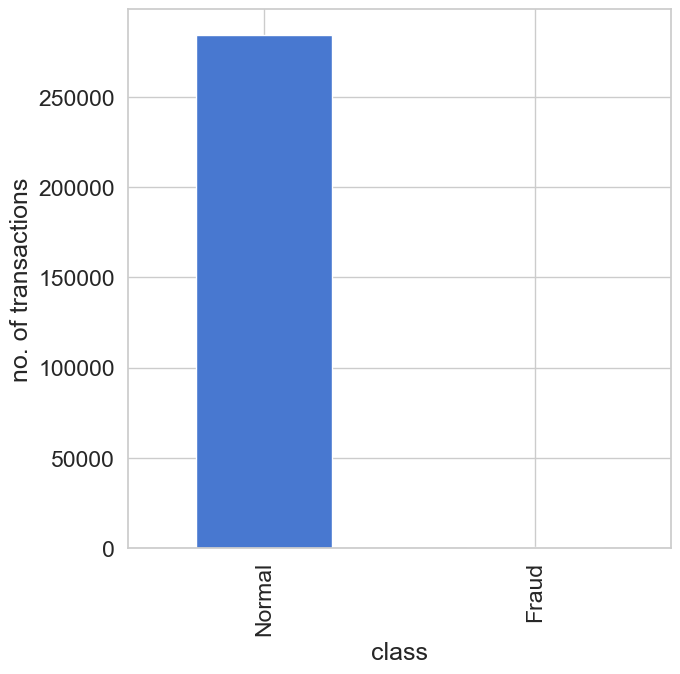

In [21]:
plt.figure(figsize=(7,7))
count_classes=df['Class'].value_counts()
count_classes.plot(kind='bar',xlabel='class',ylabel='no. of transactions')
plt.xticks(range(2), LABELS)

In [23]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [25]:
frauds.shape

(492, 31)

In [27]:
normal.shape

(284315, 31)

In [29]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [31]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

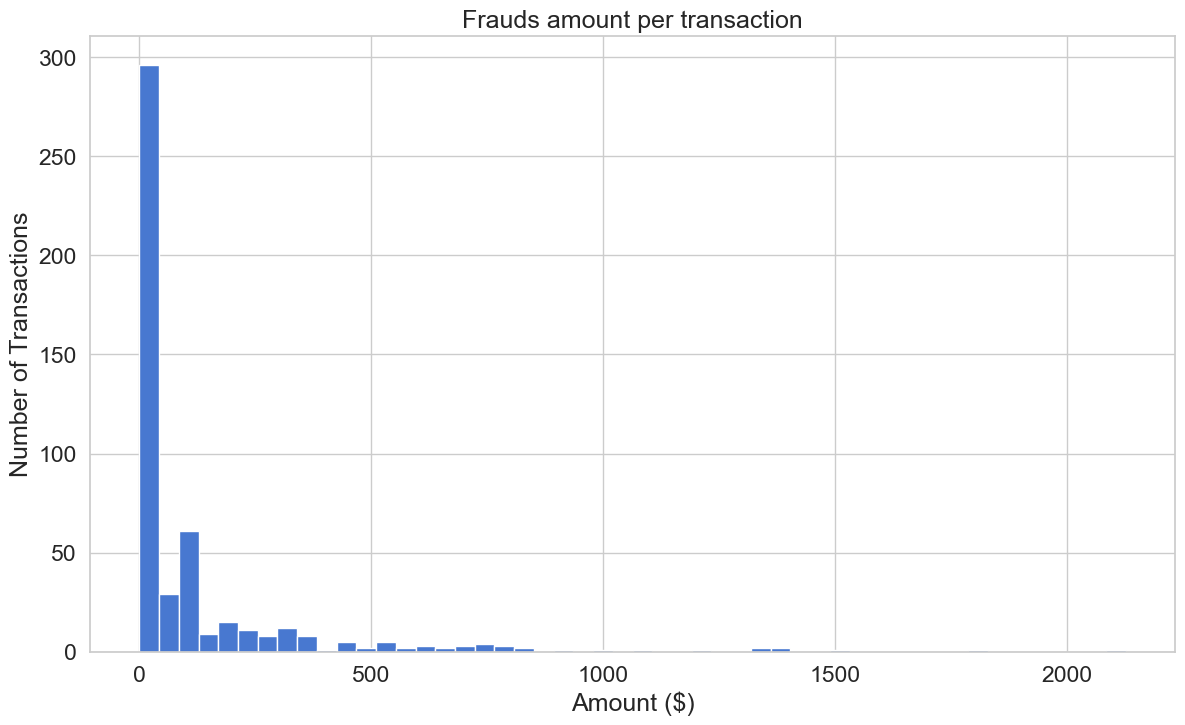

In [33]:

plt.title('Frauds amount per transaction')

bins = 50

plt.hist(frauds.Amount, bins = bins)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')


plt.show();

In [35]:
frauds


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [37]:
z=[]
#z=np.array(z)
for i,amt in enumerate(frauds['Amount']):
    if amt<=100:
        z.append(frauds.iloc[i])

In [39]:
z=np.array(z)
len(z)

362

***Most frauds did not exceed 100 dollars***

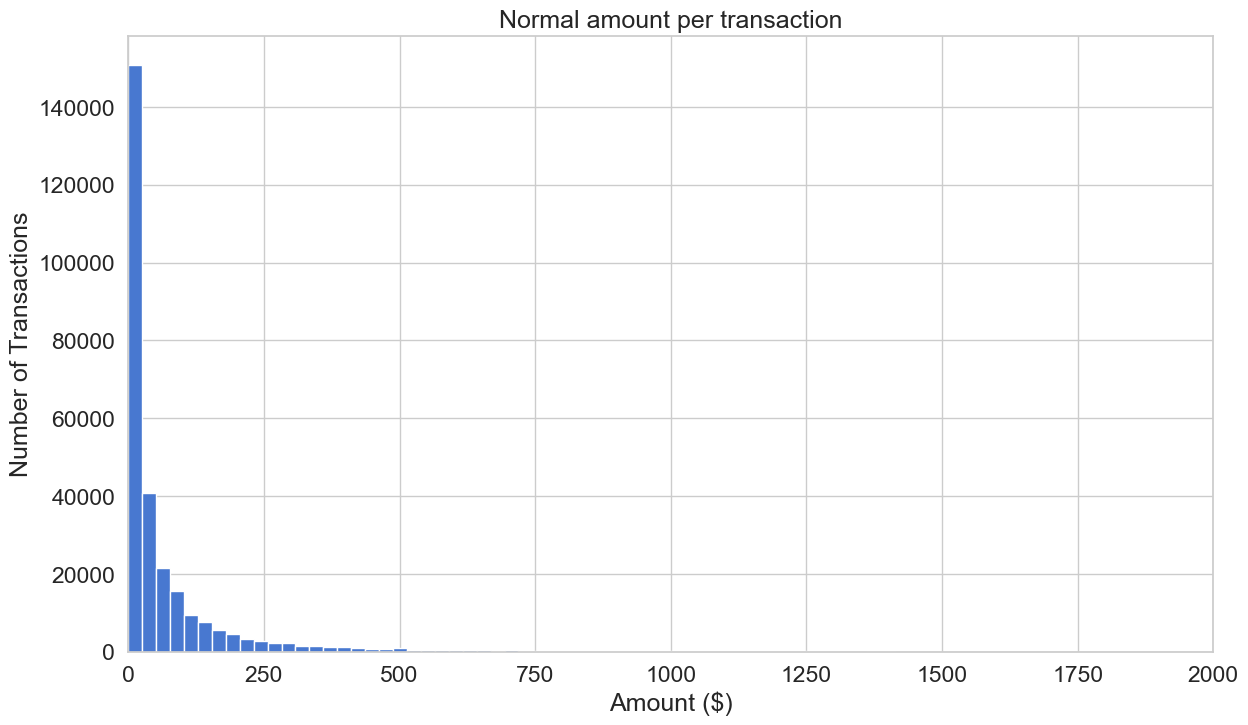

In [42]:
plt.title('Normal amount per transaction')



plt.hist(normal.Amount, bins =1000)


plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 2000))
#plt.yscale('log')
plt.show();

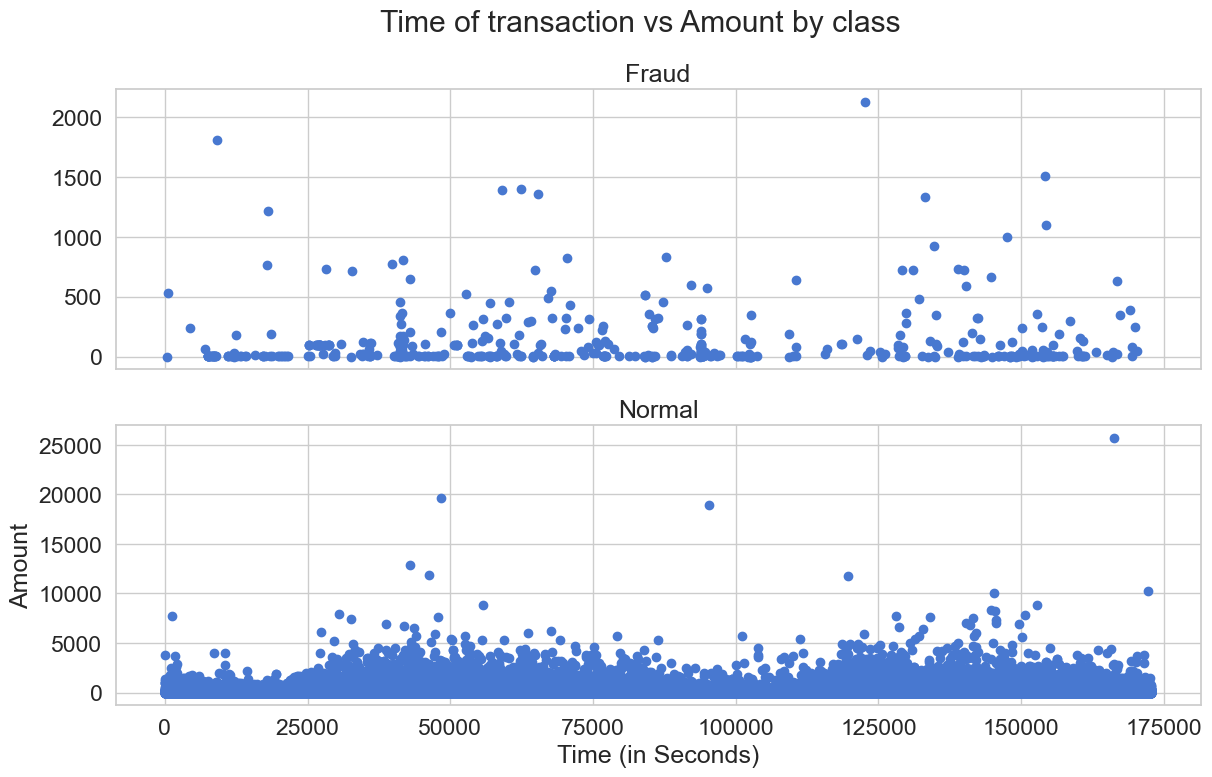

In [43]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values

In [50]:
X_train.shape

(227451, 29)

In [52]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [54]:
from keras.layers import Dense,Input
from keras.models import Model, load_model
from keras import regularizers

input_layer=Input(shape=(input_dim, ))

encoder=Dense(encoding_dim,activation='tanh',
                activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [56]:
from keras.callbacks import ModelCheckpoint, TensorBoard

nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="/Users/nihaalnadaf/Documents/Fraud Detection/model.keras",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='/Users/nihaalnadaf/Documents/Fraud Detection/logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 4s 468us/step - accuracy: 0.5234 - loss: 0.8659 - val_accuracy: 0.6536 - val_loss: 0.7955
Epoch 2/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step - accuracy: 0.6565 - loss: 0.7642 - val_accuracy: 0.6670 - val_loss: 0.7827
Epoch 3/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 451us/step - accuracy: 0.6618 - loss: 0.7615 - val_accuracy: 0.6667 - val_loss: 0.7771
Epoch 4/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 457us/step - accuracy: 0.6655 - loss: 0.7253 - val_accuracy: 0.6615 - val_loss: 0.7705
Epoch 5/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 454us/step - accuracy: 0.6673 - loss: 0.7337 - val_accuracy: 0.6679 - val_loss: 0.7663
Epoch 6/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 468us/step - accuracy: 0.6661 - loss: 0.7418 - val_accuracy: 0.6682 - val_loss: 0.7629
Epoch 7/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 488us/step - accuracy: 0.6626 - loss: 0.7308 - val_accuracy: 0.6689 - val_loss: 0.7601
Epoch 8/100
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 3s 482us/step - accuracy: 

In [66]:
autoencoder = load_model("/Users/nihaalnadaf/Documents/Fraud Detection/model.keras")

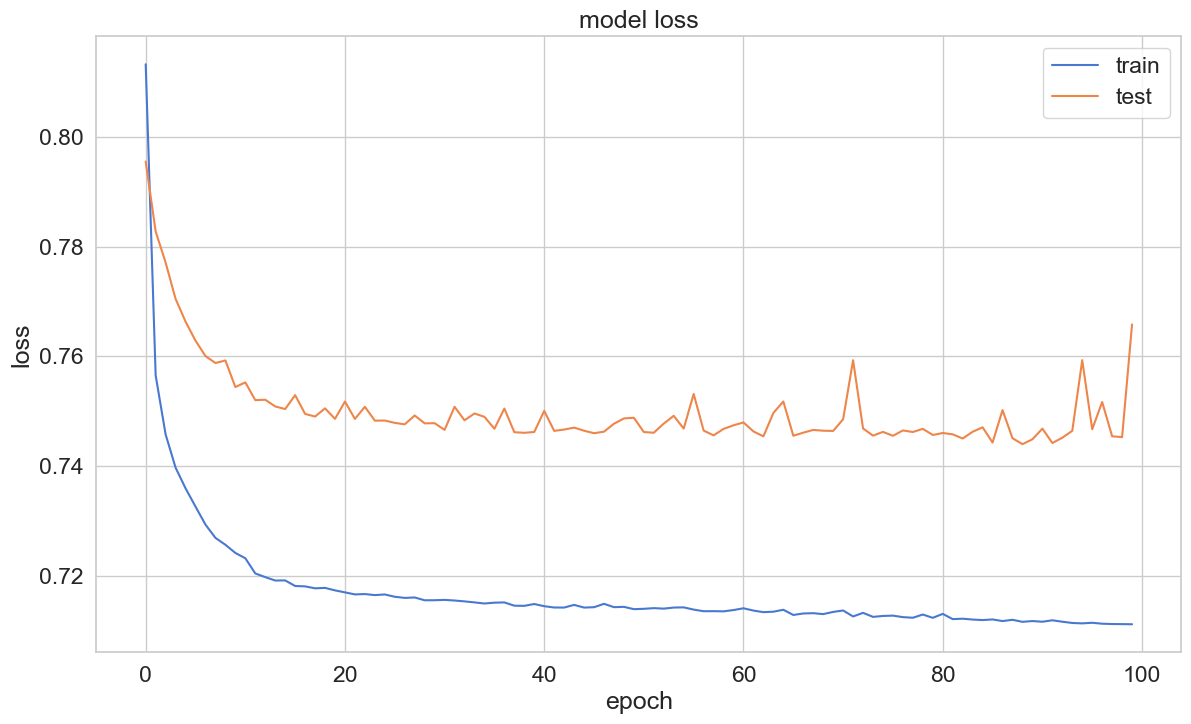

In [68]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');


In [70]:
predictions = autoencoder.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


In [72]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [74]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.736082,0.001720
std,3.417540,0.041443
min,0.039646,0.000000
25%,0.234737,0.000000
50%,0.402494,0.000000
75%,0.639682,0.000000
max,267.224582,1.000000


### Reconstruction error without fraud

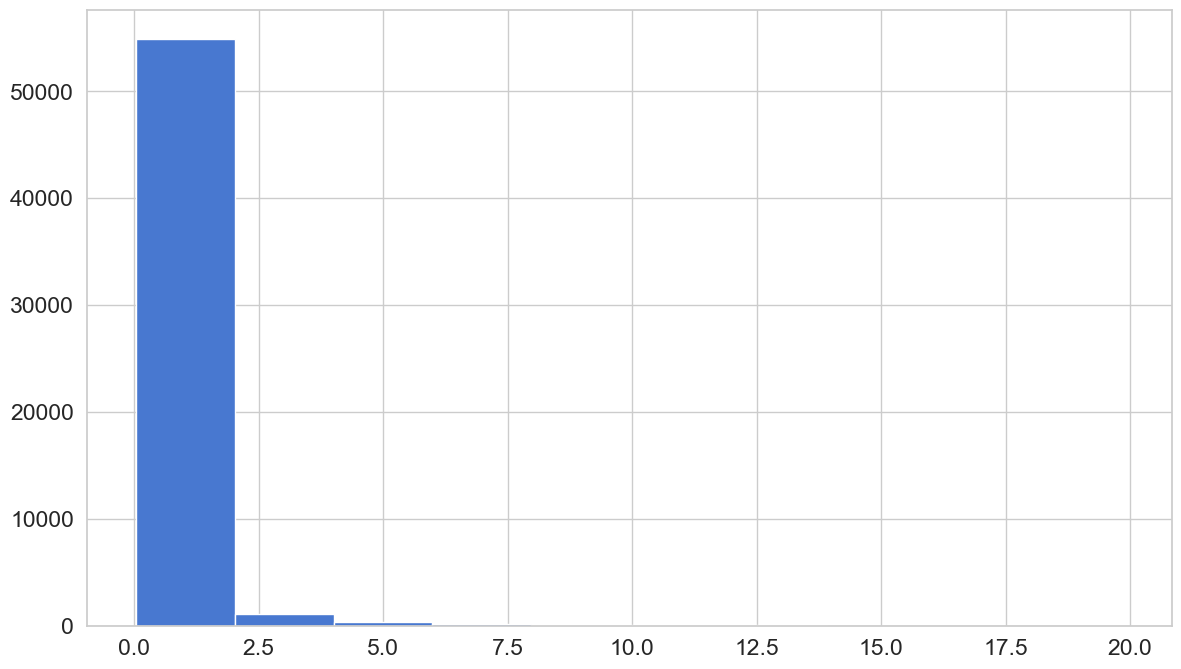

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 20)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

### Reconstruction error with fraud

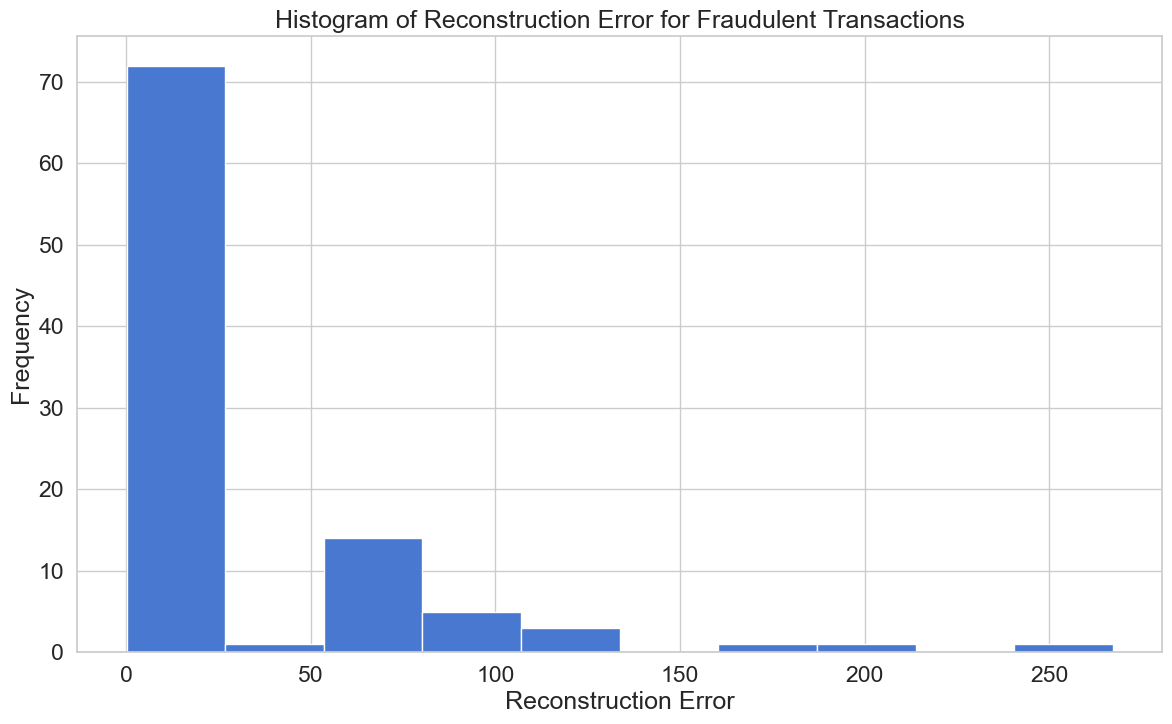

In [80]:
fraud_df = error_df[(error_df['true_class'] == 1)]
plt.hist(fraud_df['reconstruction_error'].values, bins=10)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Error for Fraudulent Transactions')
plt.show()

In [82]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

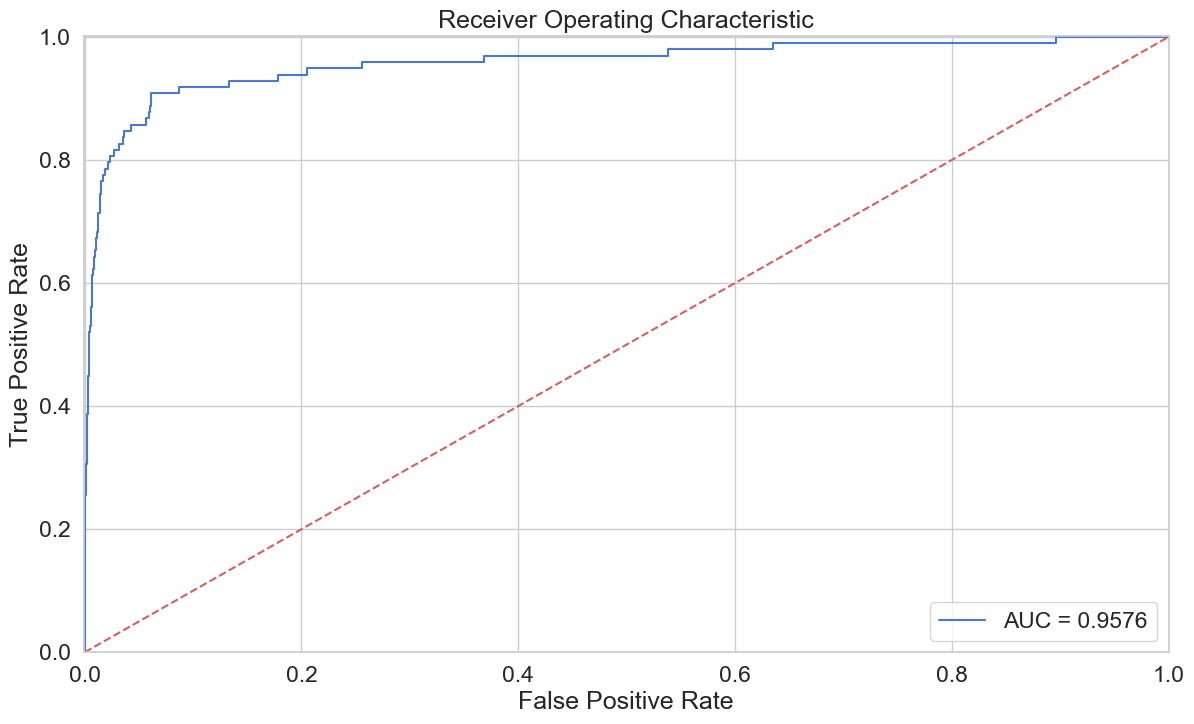

In [84]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

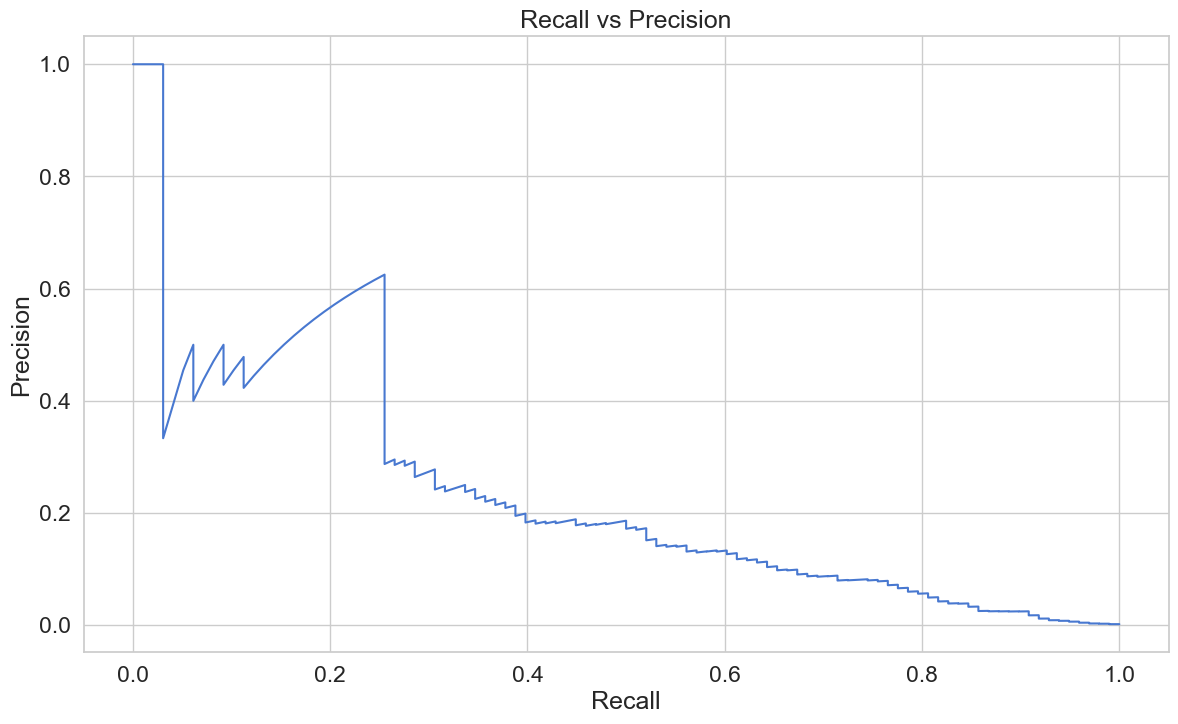

In [86]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

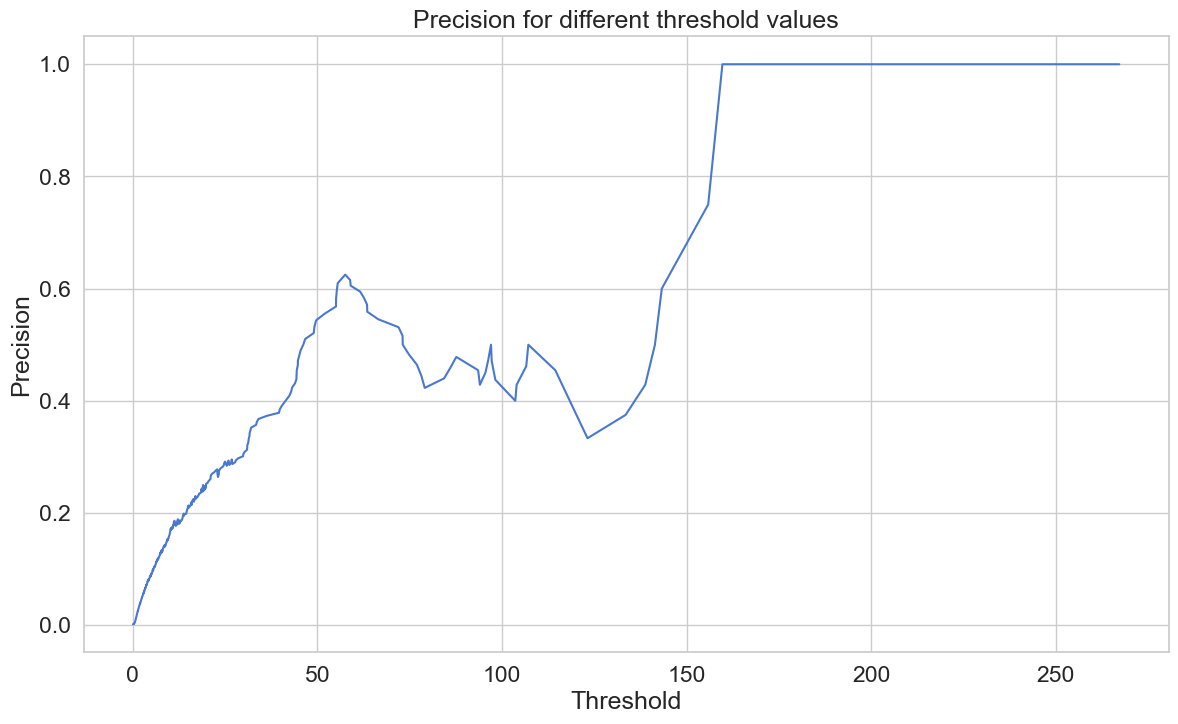

In [88]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

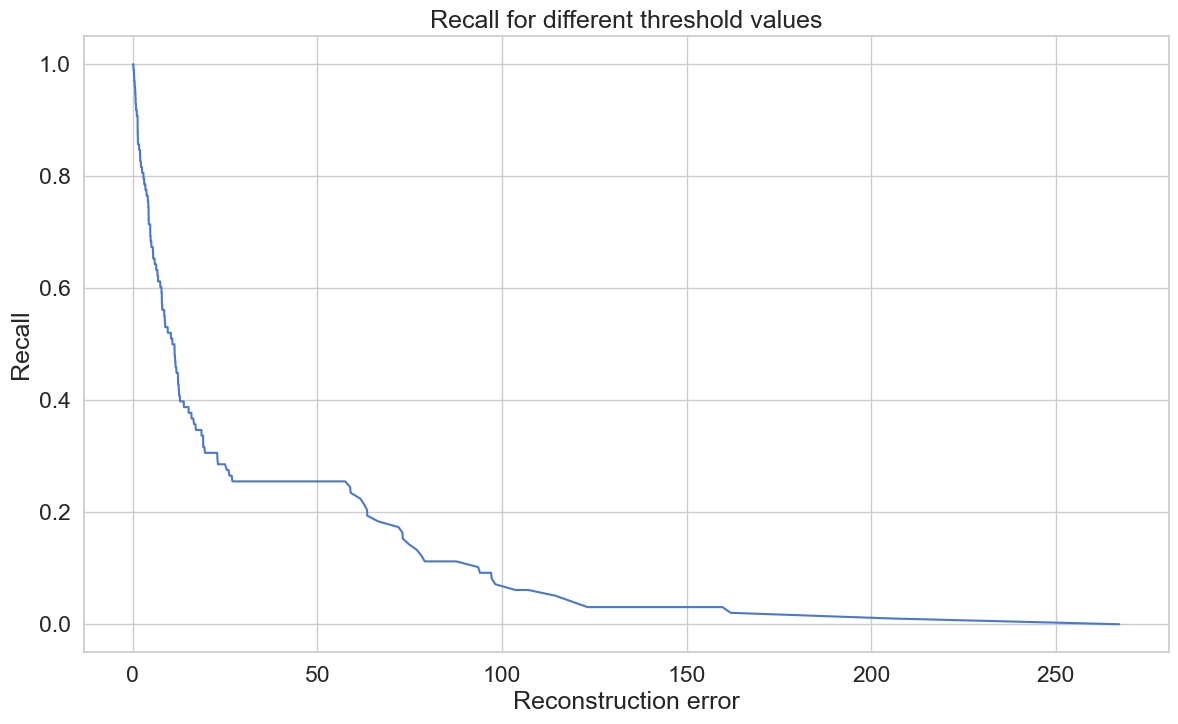

In [90]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [92]:
threshold = 2.9

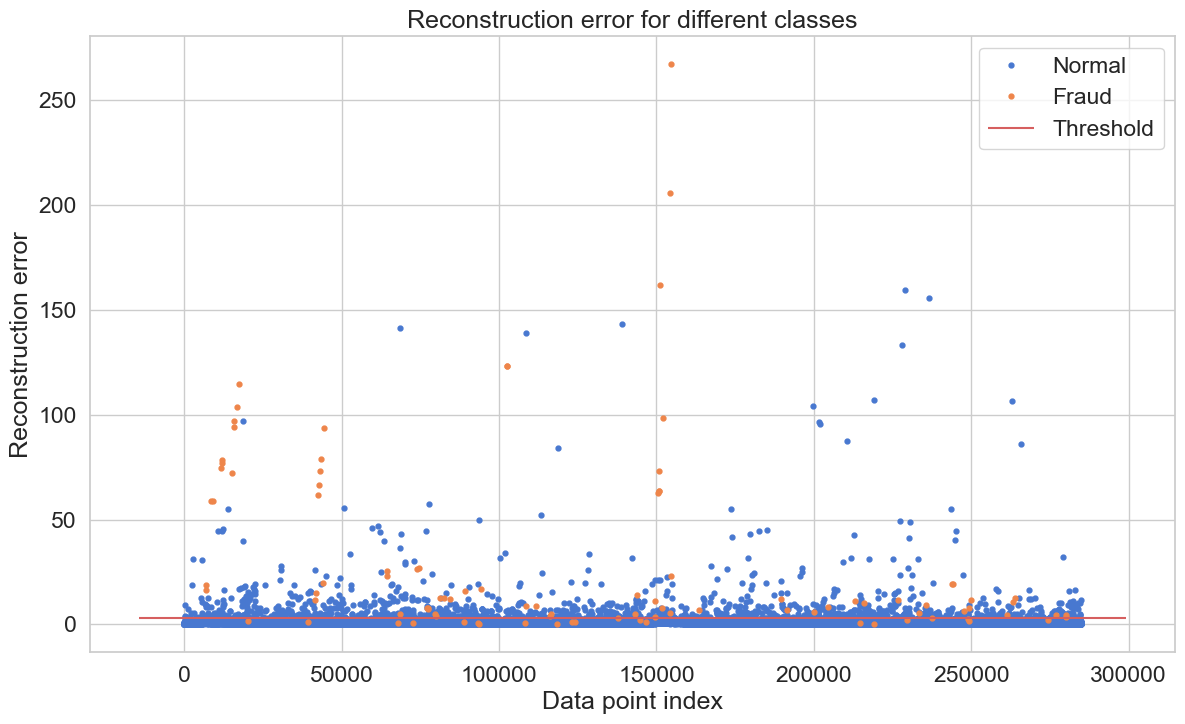

In [94]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

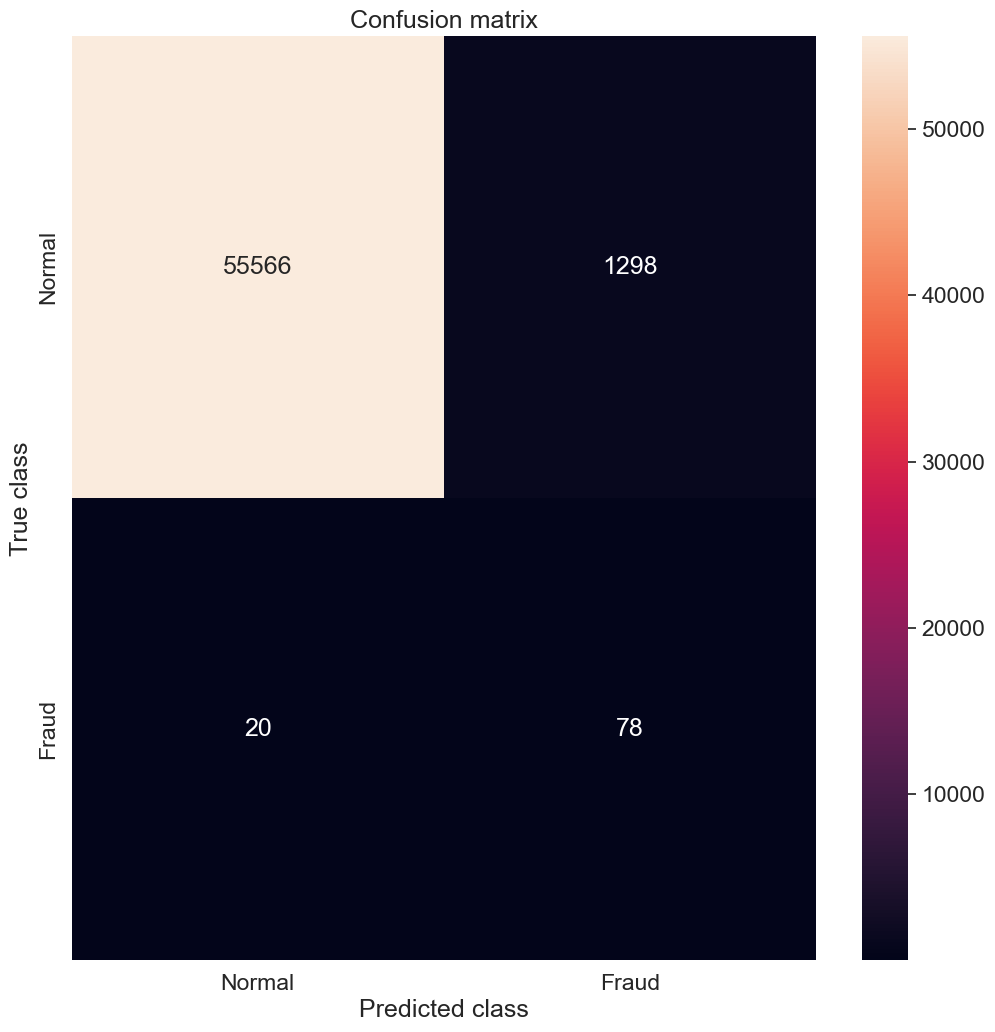

In [96]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()